<a href="https://colab.research.google.com/github/Tar-ive/Alzheimer-s-AI4All-/blob/main/darwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn-lvq

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.6 MB/s eta 0:00:00


In [ ]:
import os
import datetime
import pandas
import collections
import copy
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn_lvq import GlvqModel
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus.tables import Table

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [ ]:
dataset_path = "/content/data.csv"
output_path = "/content/output.pdf"
output_path_txt = "/content/output.txt"

In [ ]:
df.shape

(174, 452)

In [ ]:
df['class'].value_counts()

,count
class,
P,89
H,85


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

# Drop the ID column
df = df.drop('ID', axis=1)

In [ ]:
# Convert class labels to binary
df['class'] = df['class'].map({'H': 0, 'P': 1})


In [ ]:
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

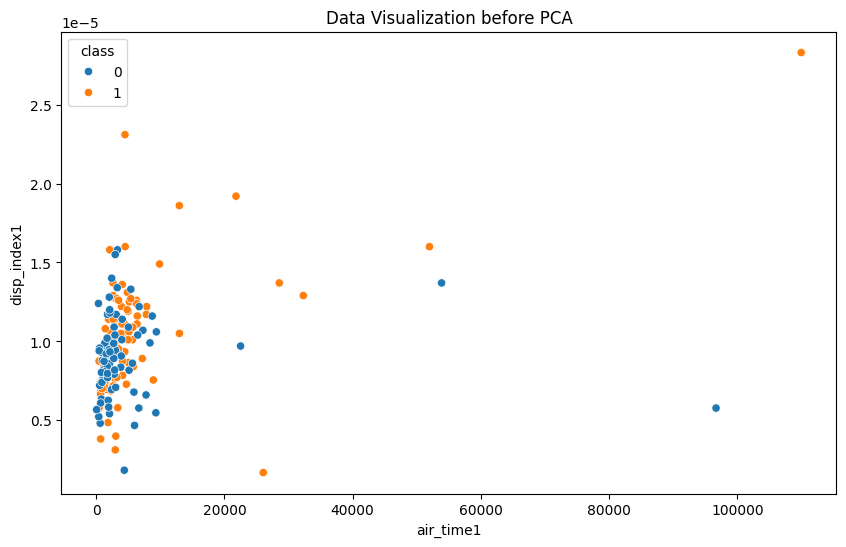

In [ ]:
# Visualize data before PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=X.columns[0], y=X.columns[1], hue='class')
plt.title('Data Visualization before PCA')
plt.show()

In [ ]:
df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05,0.511494
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05,0.501310
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04,0.000000
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04,0.000000
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04,1.000000
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05,1.000000
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06,1.000000


In [ ]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

pd.set_option('display.max_columns', None)  # Show all columns
df.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,num_of_pendown1,paper_time1,pressure_mean1,pressure_var1,total_time1,air_time2,disp_index2,gmrt_in_air2,gmrt_on_paper2,max_x_extension2,max_y_extension2,mean_acc_in_air2,mean_acc_on_paper2,mean_gmrt2,mean_jerk_in_air2,mean_jerk_on_paper2,mean_speed_in_air2,mean_speed_on_paper2,num_of_pendown2,paper_time2,pressure_mean2,pressure_var2,total_time2,air_time3,disp_index3,gmrt_in_air3,gmrt_on_paper3,max_x_extension3,max_y_extension3,mean_acc_in_air3,mean_acc_on_paper3,mean_gmrt3,mean_jerk_in_air3,mean_jerk_on_paper3,mean_speed_in_air3,mean_speed_on_paper3,num_of_pendown3,paper_time3,pressure_mean3,pressure_var3,total_time3,air_time4,disp_index4,gmrt_in_air4,gmrt_on_paper4,max_x_extension4,max_y_extension4,mean_acc_in_air4,mean_acc_on_paper4,mean_gmrt4,mean_jerk_in_air4,mean_jerk_on_paper4,mean_speed_in_air4,mean_speed_on_paper4,num_of_pendown4,paper_time4,pressure_mean4,pressure_var4,total_time4,air_time5,disp_index5,gmrt_in_air5,gmrt_on_paper5,max_x_extension5,max_y_extension5,mean_acc_in_air5,mean_acc_on_paper5,mean_gmrt5,mean_jerk_in_air5,mean_jerk_on_paper5,mean_speed_in_air5,mean_speed_on_paper5,num_of_pendown5,paper_time5,pressure_mean5,pressure_var5,total_time5,air_time6,disp_index6,gmrt_in_air6,gmrt_on_paper6,max_x_extension6,max_y_extension6,mean_acc_in_air6,mean_acc_on_paper6,mean_gmrt6,mean_jerk_in_air6,mean_jerk_on_paper6,mean_speed_in_air6,mean_speed_on_paper6,num_of_pendown6,paper_time6,pressure_mean6,pressure_var6,total_time6,air_time7,disp_index7,gmrt_in_air7,gmrt_on_paper7,max_x_extension7,max_y_extension7,mean_acc_in_air7,mean_acc_on_paper7,mean_gmrt7,mean_jerk_in_air7,mean_jerk_on_paper7,mean_speed_in_air7,mean_speed_on_paper7,num_of_pendown7,paper_time7,pressure_mean7,pressure_var7,total_time7,air_time8,disp_index8,gmrt_in_air8,gmrt_on_paper8,max_x_extension8,max_y_extension8,mean_acc_in_air8,mean_acc_on_paper8,mean_gmrt8,mean_jerk_in_air8,mean_jerk_on_paper8,mean_speed_in_air8,mean_speed_on_paper8,num_of_pendown8,paper_time8,pressure_mean8,pressure_var8,total_time8,air_time9,disp_index9,gmrt_in_air9,gmrt_on_paper9,max_x_extension9,max_y_extension9,mean_acc_in_air9,mean_acc_on_paper9,mean_gmrt9,mean_jerk_in_air9,mean_jerk_on_paper9,mean_speed_in_air9,mean_speed_on_paper9,num_of_pendown9,paper_time9,pressure_mean9,pressure_var9,total_time9,air_time10,disp_index10,gmrt_in_air10,gmrt_on_paper10,max_x_extension10,max_y_extension10,mean_acc_in_air10,mean_acc_on_paper10,mean_gmrt10,mean_jerk_in_air10,mean_jerk_on_paper10,mean_speed_in_air10,mean_speed_on_paper10,num_of_pendown10,paper_time10,pressure_mean10,pressure_var10,total_time10,air_time11,disp_index11,gmrt_in_air11,gmrt_on_paper11,max_x_extension11,max_y_extension11,mean_acc_in_air11,mean_acc_on_paper11,mean_gmrt11,mean_jerk_in_air11,mean_jerk_on_paper11,mean_speed_in_air11,mean_speed_on_paper11,num_of_pendown11,paper_time11,pressure_mean11,pressure_var11,total_time11,air_time12,disp_index12,gmrt_in_air12,gmrt_on_paper12,max_x_extension12,max_y_extension12,mean_acc_in_air12,mean_acc_on_paper12,mean_gmrt12,mean_jerk_in_air12,mean_jerk_on_paper12,mean_speed_in_air12,mean_speed_on_paper12,num_of_pendown12,paper_time12,pressure_mean12,pressure_var12,total_time12,air_time13,disp_index13,gmrt_in_air13,gmrt_on_paper13,max_x_extension13,max_y_extension13,mean_acc_in_air13,mean_acc_on_paper13,mean_gmrt13,mean_jerk_in_air13,mean_jerk_on_paper13,mean_speed_in_air13,mean_speed_on_paper13,num_of_pendown13,paper_time13,pressure_mean13,pressure_var13,total_time13,air_time14,disp_index14,gmrt_in_air14,gmrt_on_paper14,max_x_extension14,max_y_extension14,mean_acc_in_air14,mean_acc_on_paper14,mean_gmrt14,mean_jerk_in_air14,mean_jerk_on_paper14,mean_speed_in_air14,mean_speed_on_paper14,num_of_pendown14,paper_time14,pressure_mean14,pressure_var14,total_time14,air_time15,disp_i

In [ ]:
print("Full dataset class distribution:")
print(df['class'].value_counts(normalize=True))

Full dataset class distribution:
class
P    0.511494
H    0.488506
Name: proportion, dtype: float64


In [ ]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


X_scaled_df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,...,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,174.000000
mean,-5.104474e-17,2.450147e-16,1.429253e-16,-2.858505e-16,-5.104474e-18,1.174029e-16,-2.041789e-17,-7.656711e-16,-2.858505e-16,1.735521e-16,...,2.858505e-16,-1.225074e-16,1.225074e-15,3.675221e-16,-3.062684e-16,-8.167158e-17,-4.083579e-17,3.675221e-16,-5.104474e-17,0.000000
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,...,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886
min,-4.437669e-01,-2.408231e+00,-1.466259e+00,-1.532398e+00,-7.447025e-01,-3.099412e+00,-9.156549e-01,-1.289666e+00,-1.571126e+00,-7.469793e-01,...,-2.381820e+00,-1.904254e+00,-2.077787e+00,-2.103465e+00,-2.259487e+00,-1.964469e+00,-1.427725e+00,-3.575193e+00,-2.400705e+00,-0.270879
25%,-3.143817e-01,-6.058507e-01,-6.734151e-01,-5.747969e-01,-3.744703e-01,-5.499085e-01,-5.204735e-01,-5.142985e-01,-6.646889e-01,-5.100891e-01,...,-6.694440e-01,-6.538048e-01,-6.859546e-01,-6.590847e-01,-5.531980e-01,-7.238843e-01,-5.413625e-01,-4.036820e-01,-7.579602e-01,-0.211960
50%,-2.198690e-01,-9.951369e-02,-2.283101e-01,-2.157064e-01,-1.806840e-01,-1.596689e-01,-3.708303e-01,-2.505827e-01,-1.862222e-01,-3.798567e-01,...,-6.179798e-02,-1.258048e-01,-1.874479e-01,2.533870e-02,-4.814658e-02,-1.765674e-01,-3.045221e-01,3.087751e-01,-8.512391e-02,-0.177773
75%,-5.808796e-02,4.910885e-01,3.339508e-01,3.013984e-01,6.375447e-02,4.466574e-01,6.916029e-02,1.403808e-01,3.424117e-01,4.696393e-02,...,6.755446e-01,8.203106e-01,5.042724e-01,4.943927e-01,5.459069e-01,5.714324e-01,1.798614e-01,7.303034e-01,6.679245e-01,-0.073986
max,8.266455e+00,5.532087e+00,4.746979e+00,5.971756e+00,1.011463e+01,3.876778e+00,6.188476e+00,6.937676e+00,4.441613e+00,6.379290e+00,...,3.397572e+00,3.656296e+00,3.903245e+00,3.970415e+00,3.211950e+00,4.493871e+00,5.067230e+00,1.145356e+00,3.350623e+00,11.180401


In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


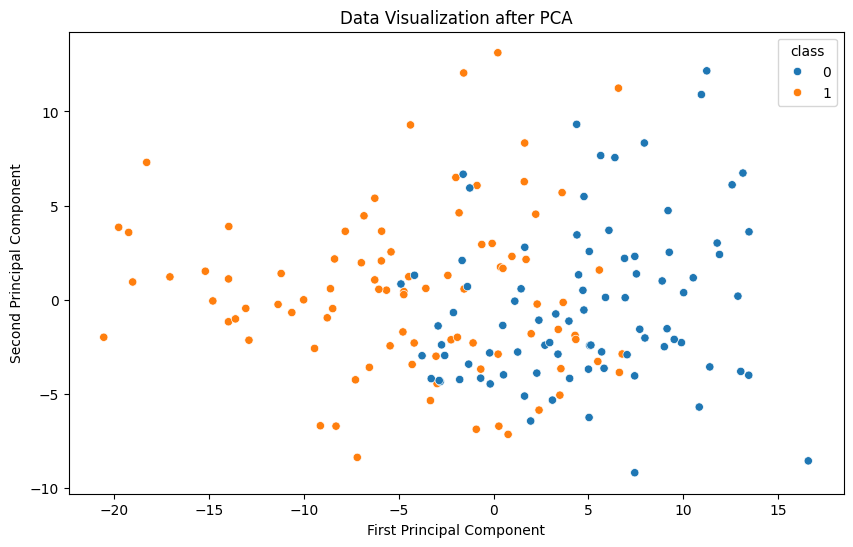

In [ ]:
# Visualize data after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('Data Visualization after PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.12760645 0.04060461]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.85      0.85      0.85        20

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35


Confusion Matrix:
[[12  3]
 [ 3 17]]


In [ ]:
#imports for SVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 8))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

In [ ]:
# SVM with RBF kernel
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)



SVM with RBF Kernel Results:
Accuracy: 0.8857142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.90      0.90      0.90        20

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



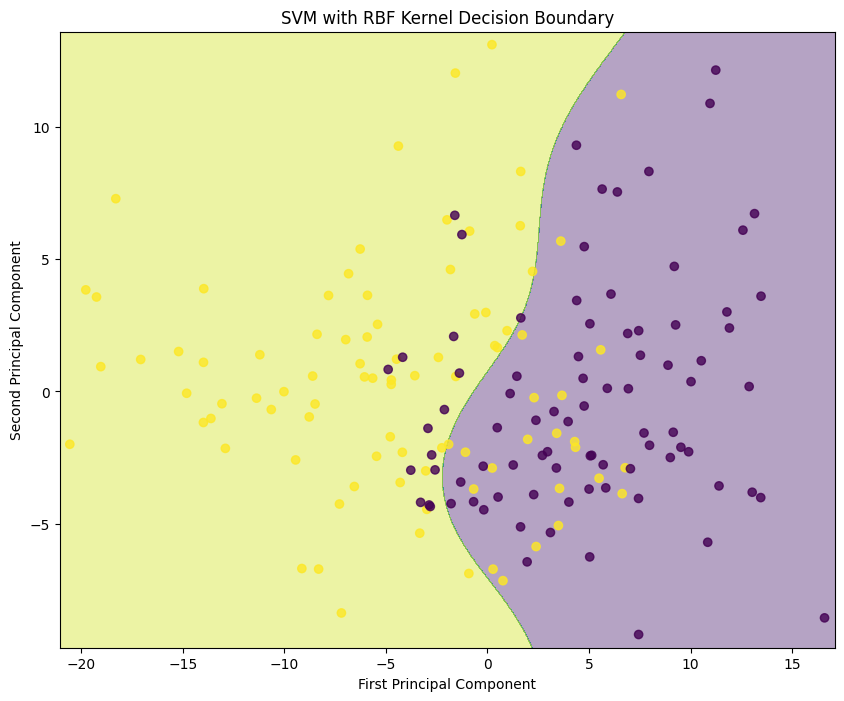

In [ ]:
print("\nSVM with RBF Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_rbf))
plot_decision_boundary(X_pca, y, svm_rbf, 'SVM with RBF Kernel Decision Boundary')

In [ ]:
 #SVM with Linear kernel
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)


SVM with Linear Kernel Results:
Accuracy: 0.8285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.85      0.85      0.85        20

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



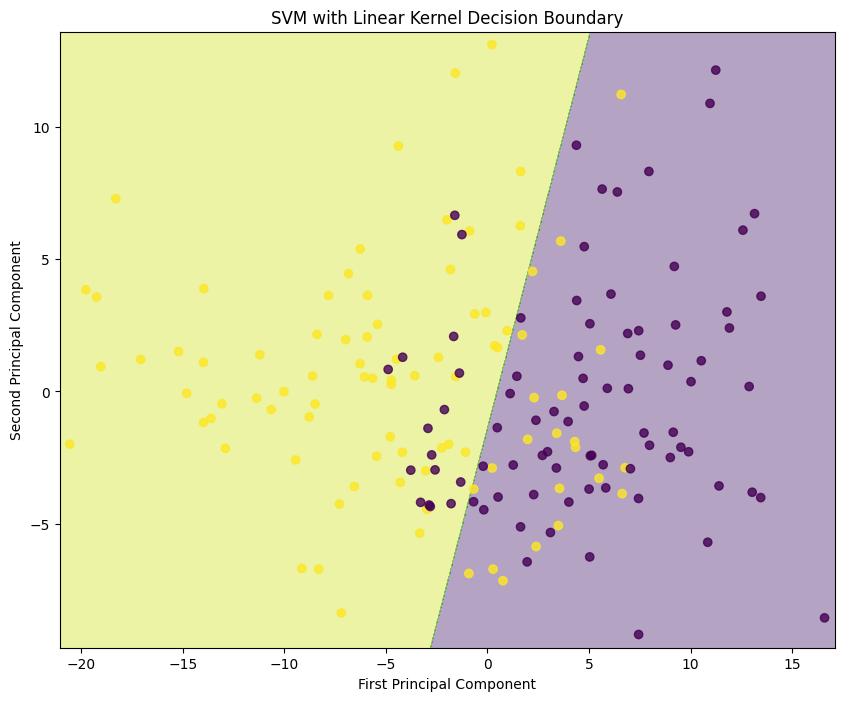

In [ ]:
print("\nSVM with Linear Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_linear))
plot_decision_boundary(X_pca, y, svm_linear, 'SVM with Linear Kernel Decision Boundary')

In [ ]:
# Logistic Regression
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Logistic Regression Results:
Accuracy: 0.8285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.85      0.85      0.85        20

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



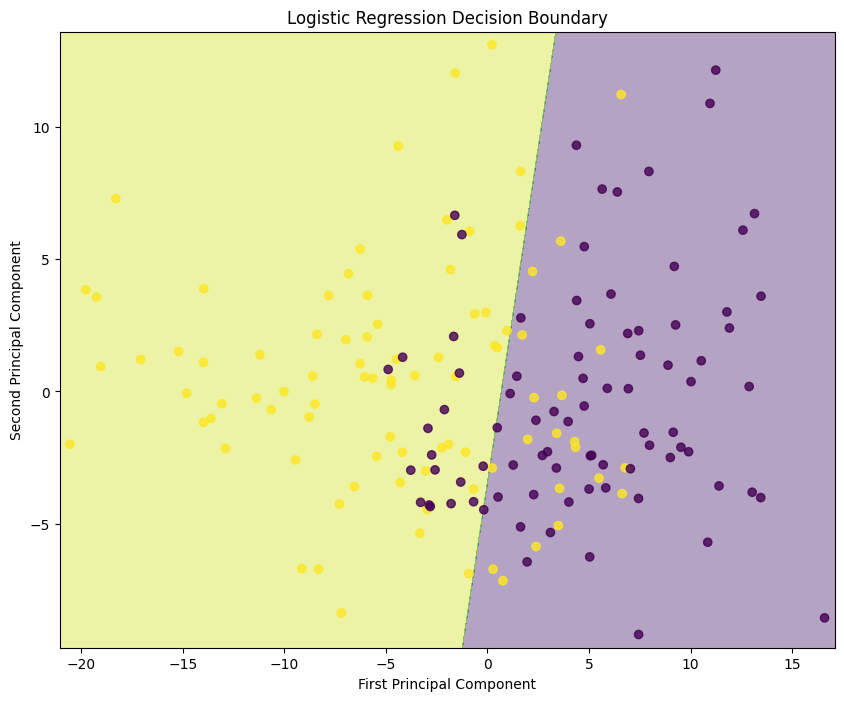

In [ ]:

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
plot_decision_boundary(X_pca, y, lr, 'Logistic Regression Decision Boundary')